In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf

In [3]:
forestfires=pd.read_csv("D:\\ExcelR Assignments\\Neural Networks\\forestfires.csv")
forestfires.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [4]:
forestfires.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
X=np.loadtxt("D:\\ExcelR Assignments\\Neural Networks\\forestfires.csv",delimiter=",",usecols=range(2,30),skiprows=1)

In [6]:
forestfires["size_category"].value_counts()

small    378
large    139
Name: size_category, dtype: int64

In [7]:
lblen=LabelEncoder()
Y=np.array(lblen.fit_transform(forestfires["size_category"]))

In [8]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(42,input_dim=28,activation='ReLU'))
model.add(tf.keras.layers.Dense(42,activation='sigmoid'))
model.add(tf.keras.layers.Dense(42,activation='ReLU'))
model.add(tf.keras.layers.Dense(42,activation='ReLU'))
model.add(tf.keras.layers.Dense(1))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 42)                1218      
_________________________________________________________________
dense_1 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_2 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_3 (Dense)              (None, 42)                1806      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 43        
Total params: 6,679
Trainable params: 6,679
Non-trainable params: 0
_________________________________________________________________


In [10]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [11]:
history=model.fit(X,Y,validation_split=0.2,epochs=50,batch_size=100)

Epoch 1/50
5/5 [==============================] - 2s 70ms/step - loss: 0.6883 - accuracy: 0.6344 - val_loss: 0.6215 - val_accuracy: 0.6923
Epoch 2/50
5/5 [==============================] - 0s 11ms/step - loss: 0.5557 - accuracy: 0.7627 - val_loss: 0.7162 - val_accuracy: 0.4327
Epoch 3/50
5/5 [==============================] - 0s 11ms/step - loss: 0.7143 - accuracy: 0.3898 - val_loss: 0.8599 - val_accuracy: 0.3462
Epoch 4/50
5/5 [==============================] - 0s 11ms/step - loss: 0.7872 - accuracy: 0.3584 - val_loss: 0.9438 - val_accuracy: 0.3558
Epoch 5/50
5/5 [==============================] - 0s 10ms/step - loss: 0.7810 - accuracy: 0.3559 - val_loss: 0.9379 - val_accuracy: 0.3654
Epoch 6/50
5/5 [==============================] - 0s 11ms/step - loss: 0.7023 - accuracy: 0.5545 - val_loss: 0.9877 - val_accuracy: 0.3750
Epoch 7/50
5/5 [==============================] - 0s 11ms/step - loss: 0.5928 - accuracy: 0.6755 - val_loss: 0.8781 - val_accuracy: 0.4904
Epoch 8/50
5/5 [===========

In [12]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

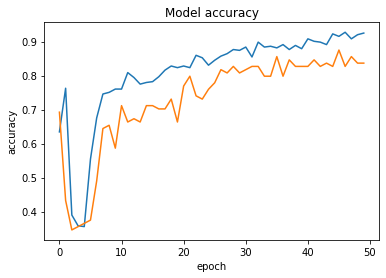

In [13]:
plt.xlabel("epoch")
plt.ylabel("accuracy")
plt.title("Model accuracy")
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

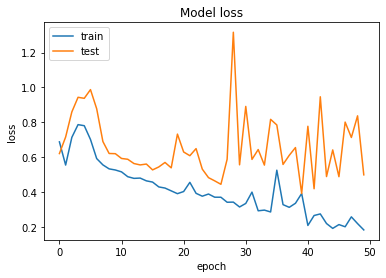

In [14]:
plt.xlabel("epoch")
plt.ylabel("loss")
plt.title("Model loss")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc='upper left')

In [15]:
print("Accuracy of model: "+str(np.mean(history.history['val_accuracy'])))
print("Loss of model: "+str(np.mean(history.history['val_loss'])))

Accuracy of model: 0.7265384584665299
Loss of model: 0.661135550737381
